Импортируем модули.

In [702]:
import os
import copy
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

Импортируем датасеты (X_bp.xlsx, X_nup.xlsx) и объединяем используя INNER.

In [2]:
x_bp_df = pd.read_excel('../data/X_bp.xlsx', sheet_name='X_bp.csv')
x_nup_df = pd.read_excel('../data/X_nup.xlsx', sheet_name='X_nup.csv')
bp_nup_df = x_bp_df.merge(x_nup_df, left_index=True, right_index=True, how='inner')

Удаляем лишние колонки - индексы датасетов

In [3]:
bp_nup_df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'],axis = 1, inplace=True)

In [4]:
bp_nup_df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


### Производим классификацию:

Смотрим данные в исходных датасетах.

In [5]:
bp_nup_df['Угол нашивки, град'] = preprocessing.LabelEncoder().fit_transform(bp_nup_df['Угол нашивки, град'])

In [6]:
list(bp_nup_df.columns)

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки']

In [7]:
df_minmax_scaler = preprocessing.MinMaxScaler().fit_transform(bp_nup_df)
df_minmax_scaler = pd.DataFrame(df_minmax_scaler, columns = list(bp_nup_df.columns))

In [8]:
df_minmax_scaler.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135


In [673]:
data_columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%',
            'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
            'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
            'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
target = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'] # 'Соотношение матрица-наполнитель'

In [622]:
df_class1 = df_minmax_scaler[(df_minmax_scaler['Угол нашивки, град'] >= 0) & (df_minmax_scaler['Угол нашивки, град'] < 1)]

In [608]:
df_class2 = df_minmax_scaler[df_minmax_scaler['Угол нашивки, град'] >= 1]

In [626]:
df_class2

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
20,0.478238,0.563509,0.106104,0.519387,0.427467,0.589311,0.721544,0.748655,0.342563,0.699069,1.0,0.276998,0.451971
21,0.232351,0.395445,0.237580,0.519387,0.427467,0.589311,0.335537,0.498136,0.504591,0.488979,1.0,0.276998,0.548135
22,0.699632,0.311413,0.324532,0.519387,0.427467,0.589311,0.335537,0.498136,0.504591,0.488979,1.0,0.276998,0.576985
23,0.422492,0.465349,0.594081,0.661582,0.431557,0.430030,0.396936,0.899139,0.551464,0.558868,1.0,0.276998,0.673149
24,0.405686,0.442914,0.470946,0.709176,0.470886,0.801957,0.617698,0.650849,0.949223,0.505320,1.0,0.346248,0.451971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,1.0,0.628535,0.452161
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,1.0,0.731664,0.516890
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,1.0,0.288158,0.650355
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,1.0,0.437186,0.560262


In [731]:
def all_around_analysis(data, target, model, param_grid=None, cv=1):
    combinations_data = []
    combinations_target = []
    matrix = pd.DataFrame()
    
    if isinstance(data, pd.DataFrame) and isinstance(target, pd.DataFrame):
        cols_data = tuple(set(list(data.columns)) - set(list(target.columns))) #list(data.columns)
        cols_target = list(target.columns)
    else:
        raise ValueError("Входные данные должны быть в формате pd.DataFrame")
    
    for _ in range(0,len(cols_data)+1):
        comb_list = list(itertools.combinations(range(len(cols_data)), _))
        combinations_data.append(comb_list)
    
    for _ in range(0,len(cols_target)+1):
        
        comb_list = list(itertools.combinations(range(len(cols_target)), _))
        combinations_target.append(comb_list)
    
    if not combinations_data:
        combinations_data = [[(0,)]]
    if not combinations_target:
        combinations_target = [[(0,)]]
    
    combinations_data.pop(0)
    combinations_target.pop(0)
    s = [item for sublist in combinations_target for item in sublist]
    s2 = [item for sublist in combinations_data for item in sublist]
    
    for i in s:
        cols_for_y = [cols_target[i[x]] for x in range(len(i))]
        str_cols_y = '///'.join(cols_for_y)
        best_cols_y = 'BestEstimator_' + str_cols_y
        matrix[str_cols_y] = ''
        matrix[best_cols_y] = ''
        for j in s2:
            cols_for_x = [cols_data[j[x]] for x in range(len(j))]
            str_cols_x = '///'.join(cols_for_x)
            matrix.loc[str_cols_x] = ''
    
    for i in s:
        cols_for_y = [cols_target[i[x]] for x in range(len(i))]
        str_cols_y = '///'.join(cols_for_y)
        best_cols_y = 'BestEstimator_' + str_cols_y
        y = df_minmax_scaler[cols_for_y]
        for j in s2:
            cols_for_x = [cols_data[j[x]] for x in range(len(j))]
            str_cols_x = '///'.join(cols_for_x)
            X = df_minmax_scaler[cols_for_x]
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=5)
            GSCV = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, verbose=2)
            GSCV.fit(X_train, y_train)
            matrix.loc[[str_cols_x], [str_cols_y]] = GSCV.best_score_
            matrix.loc[[str_cols_x], [best_cols_y]] = GSCV.best_estimator_
            #model.fit(X_train, y_train)
            #matrix.loc[[str_cols_x], [str_cols_y]] = model.score(X_test, y_test)

    return matrix

In [732]:
# DecisionTreeRegressor()
# KNeighborsRegressor(n_neighbors=3)
# Ridge(alpha=.5)
# LinearRegression()
# LassoLars(alpha=.1, normalize=False)
# MultiTaskLasso(alpha=1.0)
# ElasticNet(alpha=0.1, l1_ratio=0.7)
# df_minmax_scaler[data_columns], df_minmax_scaler[target]
param_grid = {
   'copy_X': [True],
   'fit_intercept': [True],
   'n_jobs': [None],
   'positive': [False]
}
lr = all_around_analysis(df_class1[data_columns], df_class1[target], LinearRegression(), param_grid=param_grid, cv=2)
lr.head(1)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, to

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.0s
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END copy_X=True, fit_intercept=True, n_

,"Модуль упругости при растяжении, ГПа","BestEstimator_Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","BestEstimator_Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа///Прочность при растяжении, МПа","BestEstimator_Модуль упругости при растяжении, ГПа///Прочность при растяжении, МПа"
"Угол нашивки, град",-0.022346,LinearRegression(),-0.003856,LinearRegression(),-0.013101,LinearRegression()


Object `estimator.get_params().keys()` not found.


In [625]:
lr['Шаг нашивки'].max()

-0.001839268322939569

In [699]:
lr.index.max()

'модуль упругости, ГПа///Шаг нашивки///Температура вспышки, С_2'

In [697]:
lr.loc['Угол нашивки, град', 'Модуль упругости при растяжении, ГПа']

-0.003303263335533435

In [698]:
lr.iloc[0, [0]]

Модуль упругости при растяжении, ГПа   -0.003303
Name: Угол нашивки, град, dtype: object

yyyy = range(len(lr.index))
plt.scatter(lr['Шаг нашивки'], lr.index)
plt.show()

In [488]:
y

array([0.31919382, 0.31919382, 0.31919382, ..., 0.57334596, 0.53621714,
       0.55055018])

In [403]:
dassss = issl(df_minmax_scaler[data_col], df_minmax_scaler[target_col], KNeighborsRegressor(n_neighbors=3))
dassss.head(1)

,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа///Прочность при растяжении, МПа"
Соотношение матрица-наполнитель,-0.325964,-0.281587,-0.303776


In [406]:
dassss['Прочность при растяжении, МПа'].max()

-0.14535375624701685

In [441]:
rd = issl(df_minmax_scaler[data_col], df_minmax_scaler[target_col], Ridge(alpha=.5))
rd.head(1)

,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа///Прочность при растяжении, МПа"
"Угол нашивки, град",-0.00042,-0.023919,-0.012169


In [445]:
rd['Модуль упругости при растяжении, ГПа///Прочность при растяжении, МПа'].max()

-0.005117834439637703

In [651]:
# reg = Ridge(alpha=.5)
# reg = LinearRegression()
#reg.coef_
X_reg_train = [[0, 0], [1, 1], [2, 2], [2, 4], [5, 5]]
y_reg_train = [0, 1, 2, 3, 10]
X_reg_test = [[0, 0], [1, 1], [2, 2], [2, 4], [5, 5]]
y_reg_test = [0, 1, 2, 3, 10]
reg = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False)
reg.fit(X_reg_train, y_reg_train)
reg_score = reg.score(X_reg_test, y_reg_test)

In [652]:
reg_score

0.4

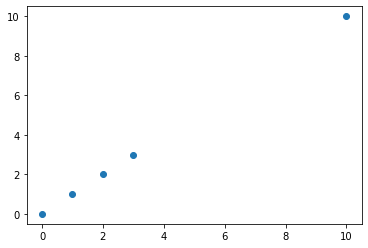

In [656]:
plt.scatter(y_reg_test, y_reg_train)
plt.show()

In [672]:
lr.to_csv('matrix4.csv')

In [682]:
matr = pd.DataFrame()
matr['Rows'] = np.nan
#matr.loc['Rowsss'] = ''
#matr.loc[['Rowsss'], ['Test1']] = 12
#matr.loc['Rowsss'] = ''
#matr.loc[['Rowsss'], ['Test12']] = 13
matr.head(5)

,Rows


In [340]:
X = df_minmax_scaler[data_col] #[col]
X

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.276998
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.276998
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.276998
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.346248
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.346248
...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,0.628535
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,0.731664
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,0.288158
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,0.437186


In [341]:
y = df_minmax_scaler[target_col] #'Угол нашивки, град'
y

,"Угол нашивки, град",Плотность нашивки
0,0.0,0.548135
1,0.0,0.576985
2,0.0,0.673149
3,0.0,0.451971
4,0.0,0.548135
...,...,...
1018,1.0,0.452161
1019,1.0,0.516890
1020,1.0,0.650355
1021,1.0,0.560262


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42)

In [14]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.5414201183431953


In [343]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
print(neigh.score(X_test, y_test))

-0.45311608499920764


In [16]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test))

0.5384615384615384


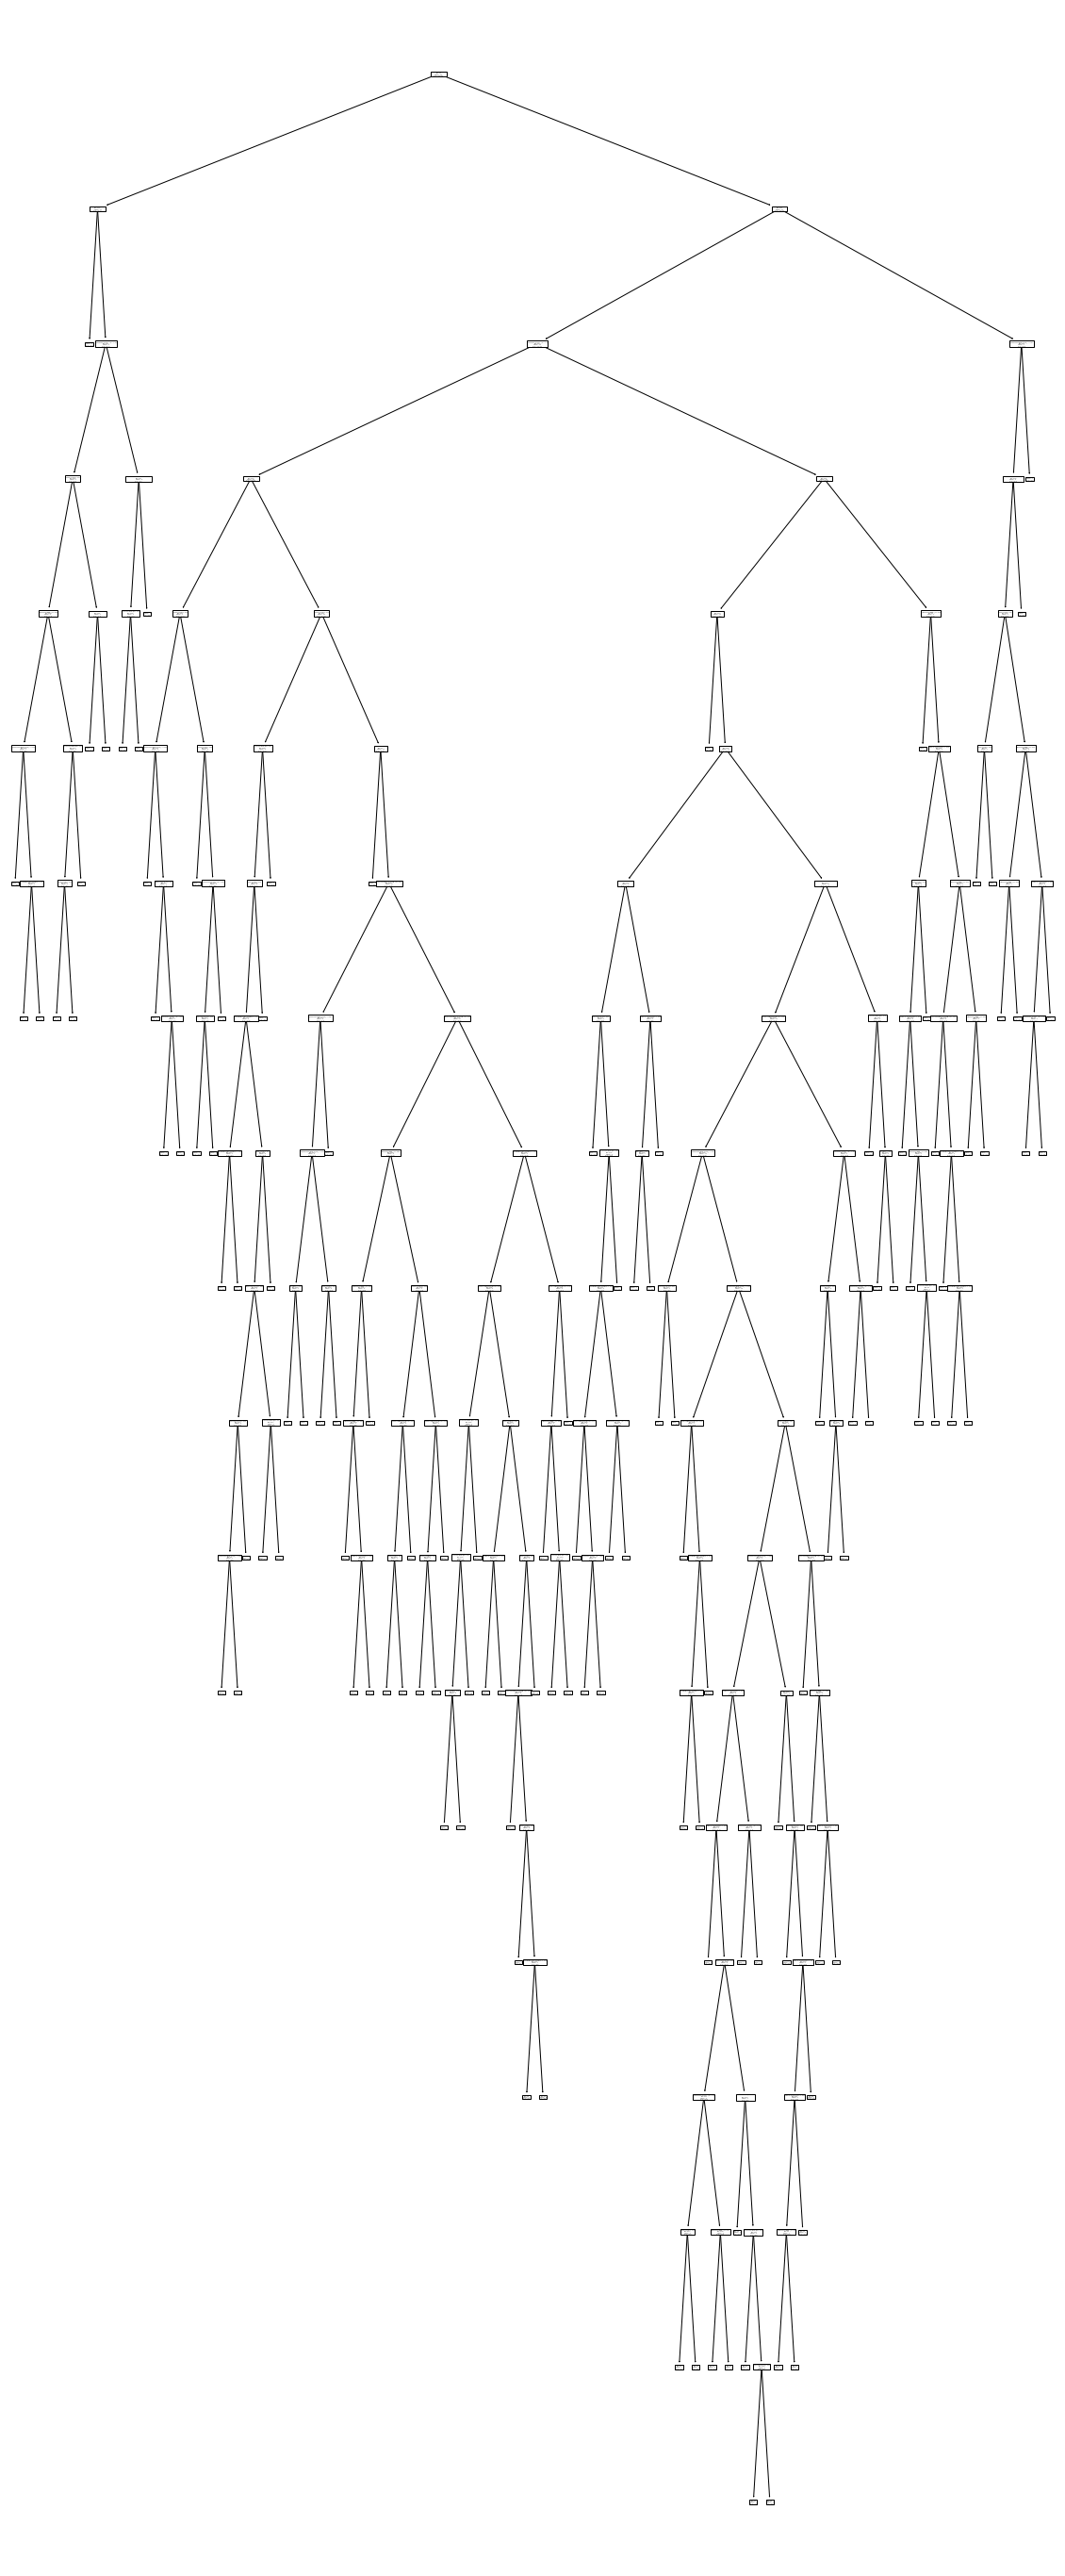

In [25]:
plt.figure(figsize=(20,50))
tree.plot_tree(dtc, feature_names=X.columns);

In [19]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print(dtr.score(X_test, y_test))

-0.7781986531986531


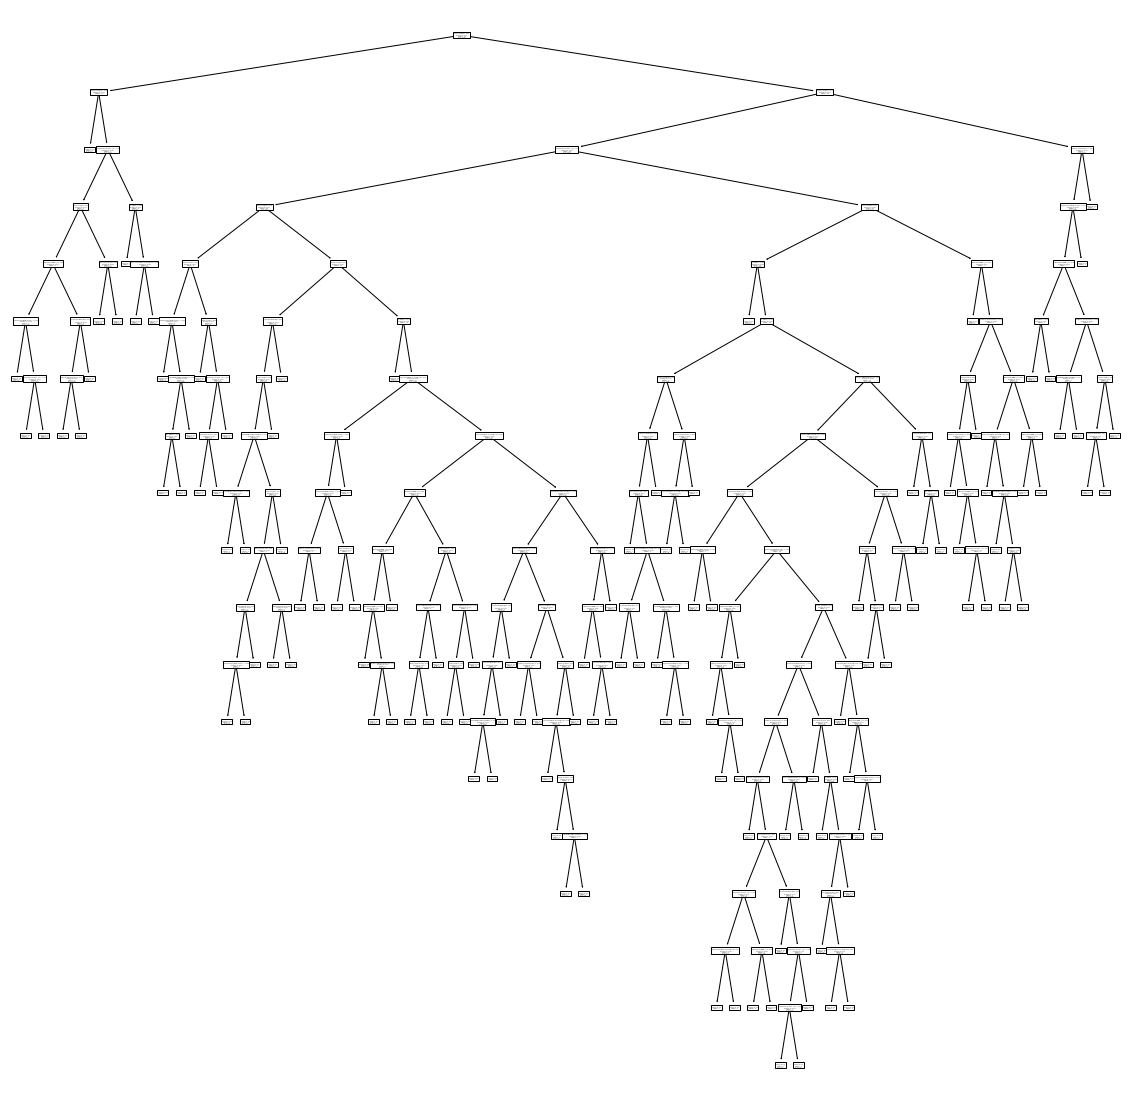

In [23]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtr, feature_names=X.columns);

In [52]:
#KNeighborsRegressor()
bagging = BaggingRegressor(DecisionTreeRegressor(max_depth=4), max_samples=0.67, max_features=0.33).fit(X_train, y_train)

In [53]:
bagging.score(X_test, y_test)

0.028694061710596408

In [54]:
rng = np.random.RandomState(1)
clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=rng).fit(X_train, y_train)

In [55]:
clf.score(X_test, y_test)

0.08361759536851954